Data Preprocessing:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('US_Accidents_Dec21_updated.csv')

# Select relevant features
features = ['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
            'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
            'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition',
            'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
            'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
            'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'City', 'County', 'State', 'Side']

data = data[features]

# Handle missing values
data.fillna(data.mean(), inplace=True)

# Encode categorical variables
le = LabelEncoder()
categorical_features = ['Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight',
                        'Nautical_Twilight', 'Astronomical_Twilight', 'City', 'County', 'State', 'Side']

for feature in categorical_features:
    data[feature] = le.fit_transform(data[feature].astype(str))


# Convert boolean features to int
boolean_features = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']
for feature in boolean_features:
    data[feature] = data[feature].astype(int)

# Convert Start_Time and End_Time to hour of the day
data['Start_Time'] = pd.to_datetime(data['Start_Time']).dt.hour
data['End_Time'] = pd.to_datetime(data['End_Time']).dt.hour

# Split the dataset into training and testing sets
X = data.drop('Severity', axis=1)
y = data['Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-1-74b13f2975e9>:20: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


Model training:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Initialize the RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

# Set up the hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, n_jobs=-1, error_score='raise')
grid_search.fit(X_train, y_train)

# Train the model with the best parameters
best_params = grid_search.best_params_
model = RandomForestClassifier(**best_params)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8346760070052539

Classification Report:
               precision    recall  f1-score   support

           2       0.85      0.98      0.91      2289
           3       0.60      0.18      0.28       404
           4       0.82      0.43      0.57       162

    accuracy                           0.83      2855
   macro avg       0.76      0.53      0.58      2855
weighted avg       0.81      0.83      0.80      2855



Model evaluation:

In [ ]:
# Predict the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


Accuracy: 0.8347
Classification Report:
              precision    recall  f1-score   support

           2       0.85      0.98      0.91      2289
           3       0.60      0.18      0.28       404
           4       0.82      0.43      0.57       162

    accuracy                           0.83      2855
   macro avg       0.76      0.53      0.58      2855
weighted avg       0.81      0.83      0.80      2855



Visualization and Analysis:

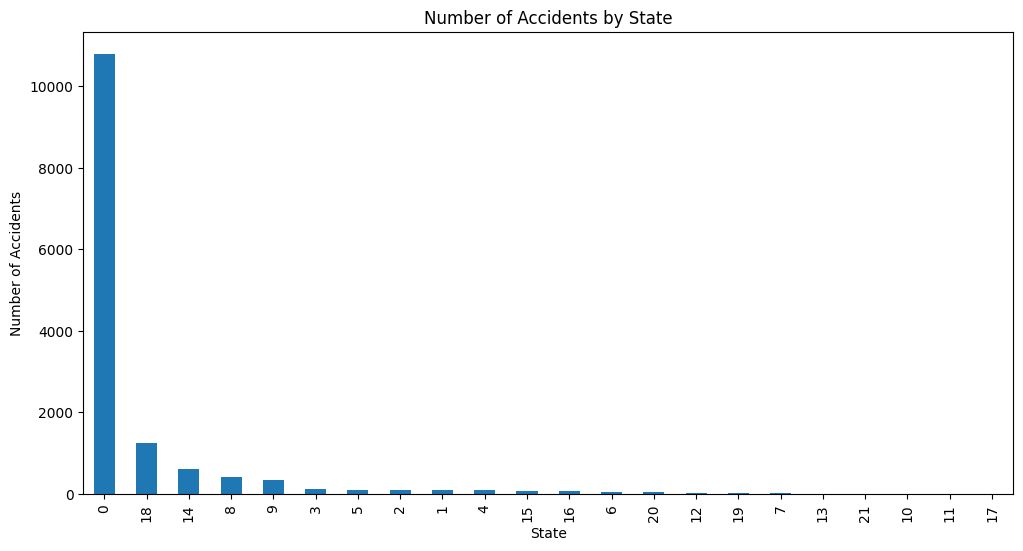

In [ ]:
#Number of accidents by state
accidents_by_state = data['State'].value_counts()
plt.figure(figsize=(12, 6))
accidents_by_state.plot(kind='bar')
plt.title('Number of Accidents by State')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.show()


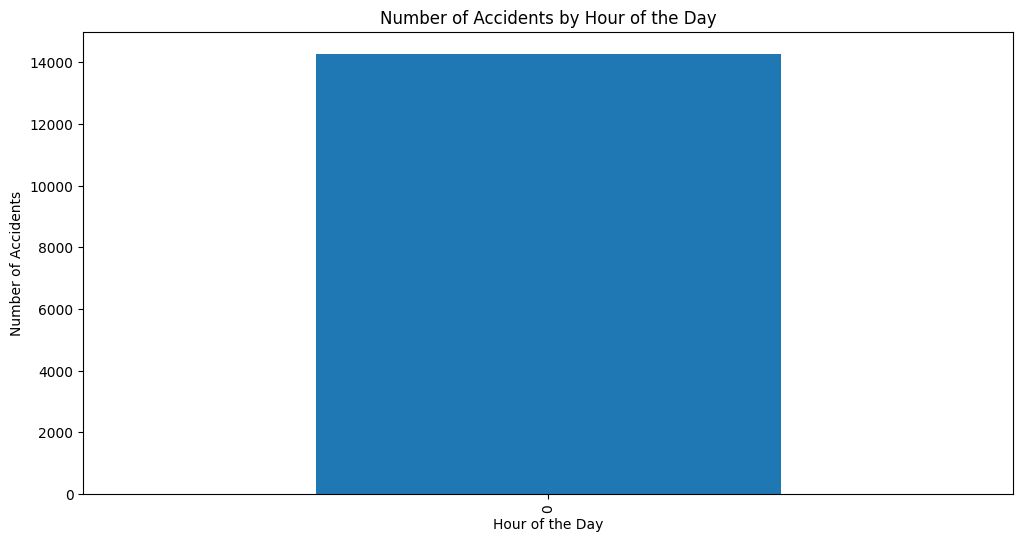

In [ ]:
# Convert Start_Time to hour of the day
data['Start_Time'] = pd.to_datetime(data['Start_Time']).dt.hour

# Plot accidents by hour of the day
accidents_by_hour = data['Start_Time'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
accidents_by_hour.plot(kind='bar')
plt.title('Number of Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()

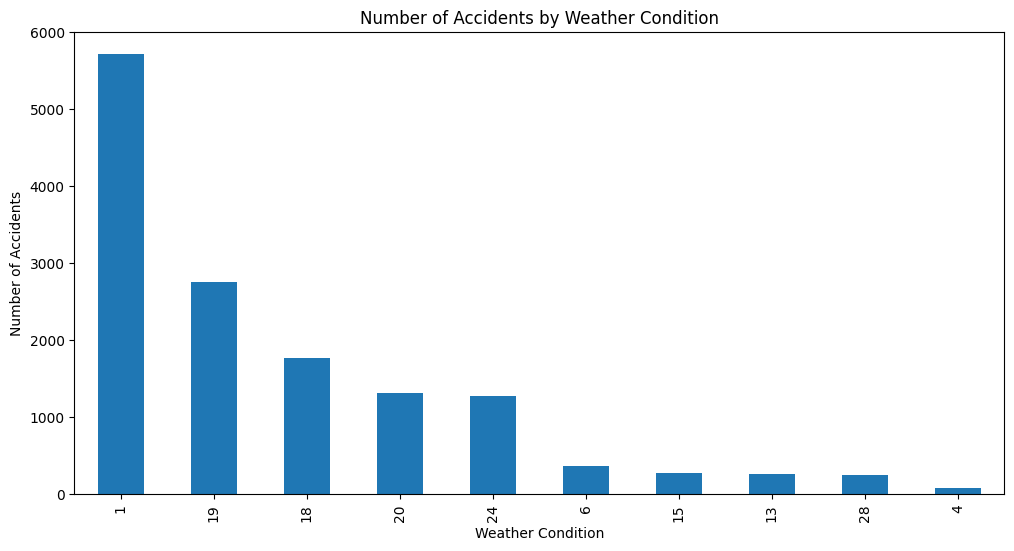

In [ ]:
# Group by weather condition and count accidents
accidents_by_weather = data.groupby('Weather_Condition').size().sort_values(ascending=False)

# Plot the top 10 weather conditions
plt.figure(figsize=(12, 6))
accidents_by_weather[:10].plot(kind='bar')
plt.title('Number of Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.show()


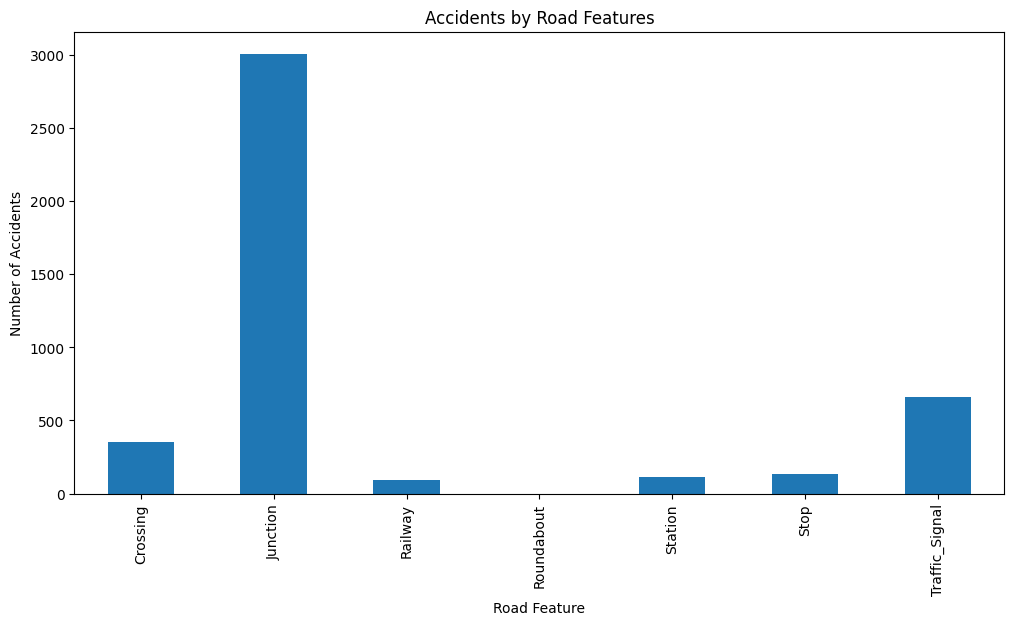

In [ ]:
road_features = ['Crossing', 'Junction', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Signal']
accidents_by_road_features = data[road_features].sum()
plt.figure(figsize=(12, 6))
accidents_by_road_features.plot(kind='bar')
plt.title('Accidents by Road Features')
plt.xlabel('Road Feature')
plt.ylabel('Number of Accidents')
plt.show()


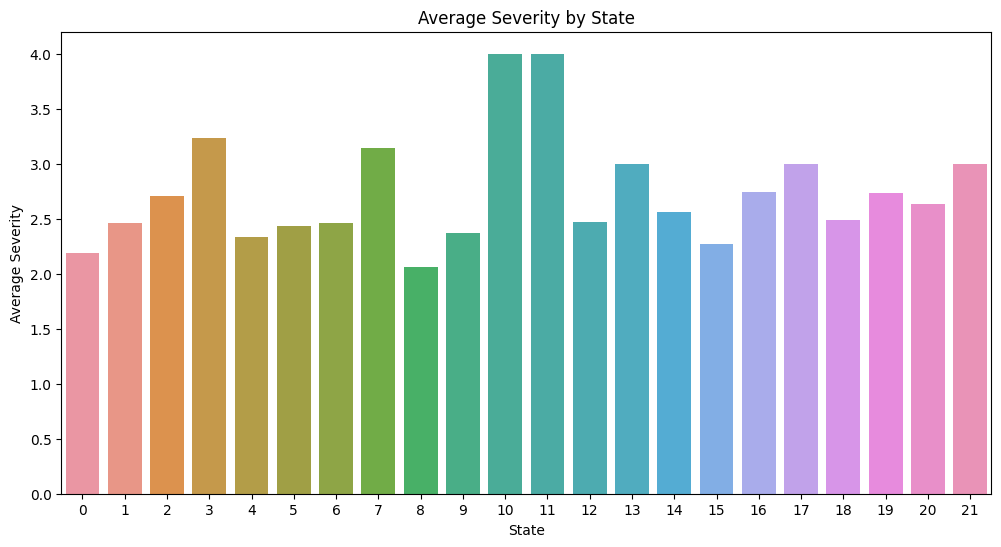

In [ ]:
#Severity distribution across states:

state_severity = data.groupby('State')['Severity'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=state_severity.index, y=state_severity.values)
plt.title('Average Severity by State')
plt.xlabel('State')
plt.ylabel('Average Severity')
plt.show()


<ipython-input-12-6d47c0ab9dc6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')


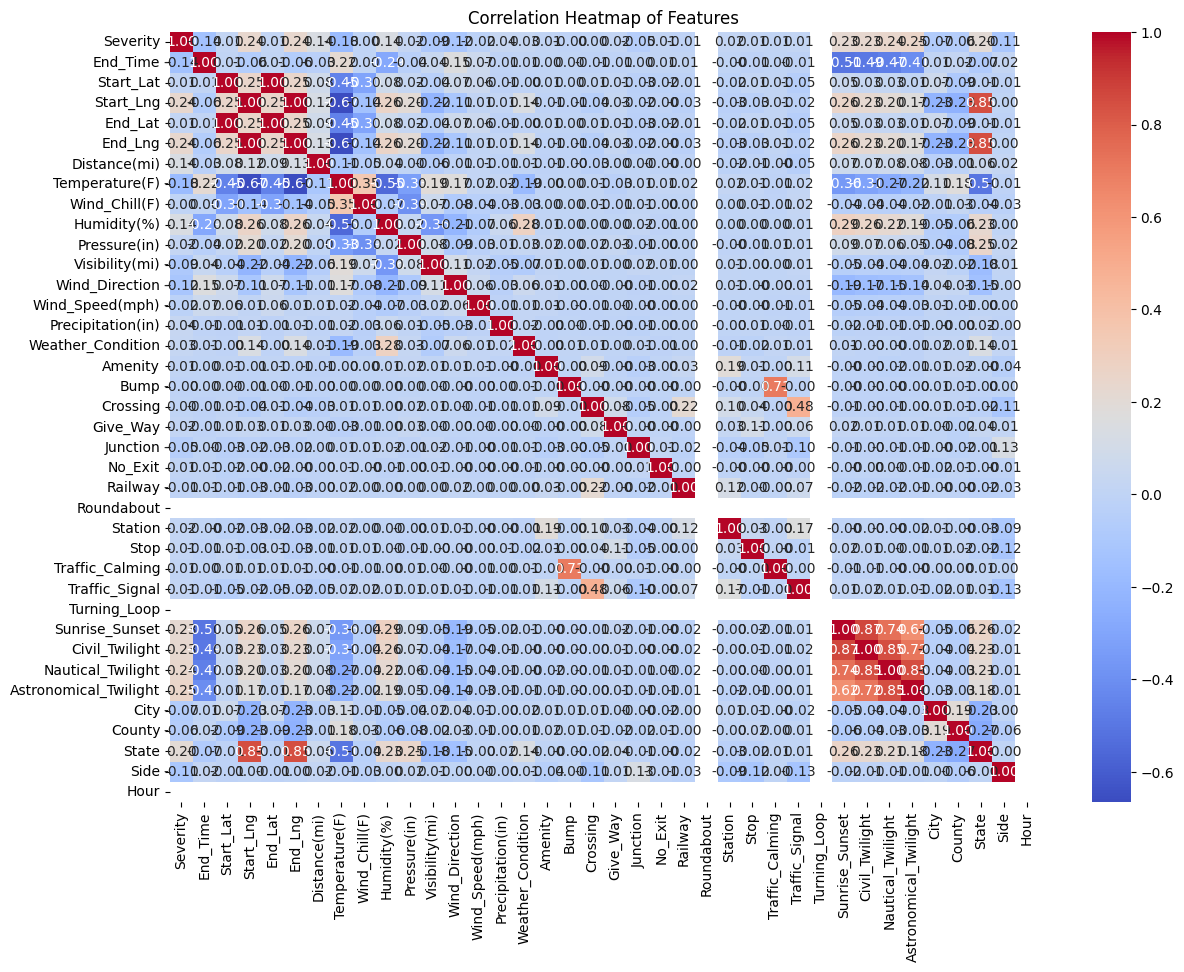

In [ ]:
# Correlation heatmap of features:
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()
